# Chicago

This notebooks displays some of the data available at [Divvy Data](https://www.divvybikes.com/system-data). We assume the data was downloaded.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Data

In [3]:
from pyensae.datasource import download_data
file = download_data("Divvy_Trips_2016_Q3Q4.zip", url="https://s3.amazonaws.com/divvy-data/tripdata/")

### Stations

In [4]:
import pandas
stations = df = pandas.read_csv("Divvy_Stations_2016_Q3.csv")
df.head()

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013


In [5]:
import folium
from pyensae.notebookhelper import folium_html_map
minx, maxx = df.latitude.min(), df.latitude.max()
miny, maxy = df.longitude.min(), df.longitude.max()
map_osm = folium.Map(location=[(minx + maxx)/2, (miny + maxy)/2], 
                     min_lat=minx, max_lat=maxx, min_lon=miny, max_lon=maxy, zoom_start=11)
for rows in df.to_dict("records"):
    x,y = rows["latitude"], rows["longitude"]
    name = rows["name"]
    map_osm.add_child(folium.CircleMarker([x, y], popup=name, radius=10, fill_color="yellow"))
folium_html_map(map_osm, width="80%")

<pyensae.notebookhelper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x1ba5b17bc50>

### Trips

In [6]:
bikes = df = pandas.read_csv("Divvy_Trips_2016_Q3.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,12150160,9/30/2016 23:59:58,10/1/2016 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,Subscriber,Male,1988.0
1,12150159,9/30/2016 23:59:58,10/1/2016 00:04:09,2589,251,383,Ashland Ave & Harrison St,320,Loomis St & Lexington St,Subscriber,Female,1990.0
2,12150158,9/30/2016 23:59:51,10/1/2016 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN
3,12150157,9/30/2016 23:59:51,10/1/2016 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,Subscriber,Female,1988.0
4,12150156,9/30/2016 23:59:32,10/1/2016 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,Customer,NaN,NaN


In [7]:
df.shape

(1441811, 12)

In [8]:
df["dtstart"] = pandas.to_datetime(df.starttime, infer_datetime_format=True)
df["dtstop"] = pandas.to_datetime(df.stoptime, infer_datetime_format=True)

In [9]:
from datetime import datetime, time
df["day"] = df.dtstart.apply(lambda r: r.timetuple().tm_yday)
df["time"] = df.dtstart.apply(lambda r: time(r.hour, r.minute, 0))

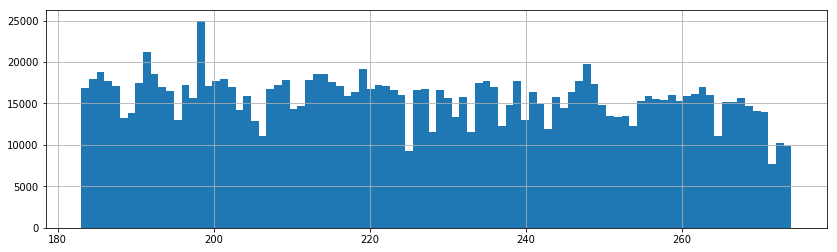

In [10]:
df.day.hist(figsize=(14,4), bins=92)

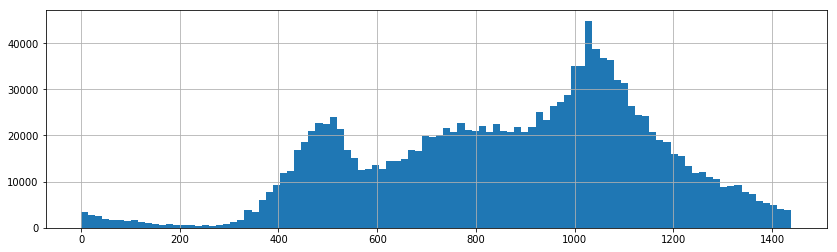

In [11]:
df.time.apply(lambda t: t.minute + t.hour*60).hist(figsize=(14,4), bins=100)

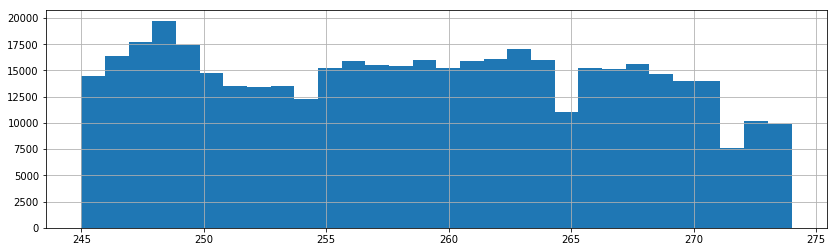

In [12]:
sept = df[(df.dtstart >= datetime(2016,9,1)) & (df.dtstart < datetime(2016,10,1))]
sept.day.hist(figsize=(14,4), bins=30)

In [13]:
sept16 = sept[(sept.dtstart >= datetime(2016,9,12)) & (sept.dtstart < datetime(2016,9,17))].copy()

In [14]:
sept16[["from_station_id", "trip_id"]].groupby("from_station_id").count().sort_values("trip_id", ascending=False).head(n=20)

,trip_id
from_station_id,
35,1674
91,1298
77,1110
174,991
192,898
177,892
75,844
76,814
133,718


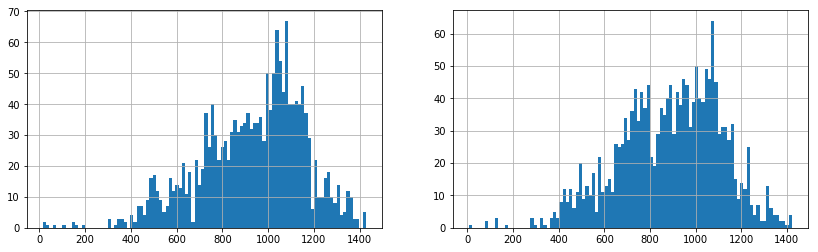

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sept16[sept16.from_station_id == 35]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[0])
sept16[sept16.to_station_id == 35]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[1])

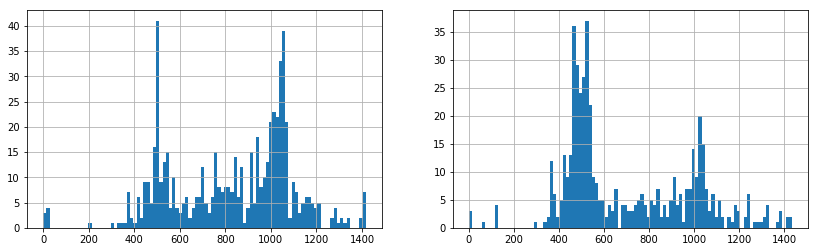

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sept16[sept16.from_station_id == 36]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[0])
sept16[sept16.to_station_id == 36]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[1])

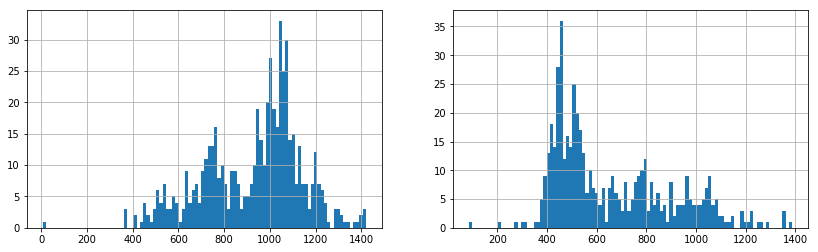

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sept16[sept16.from_station_id == 49]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[0])
sept16[sept16.to_station_id == 49]["time"].apply(lambda t: t.minute + t.hour*60).hist(bins=100, ax=ax[1])